# Step 0: Imports and Reading Data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [84]:
# Data from https://finance.yahoo.com/quote/ETH-USD/history/
df = pd.read_csv('ETH-USD.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [85]:
df # Column name, first 5 and last 5 data, and number of columns and rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1920,2023-02-11,1514.941895,1541.334717,1510.146973,1539.926758,1539.926758,5064007416
1921,2023-02-12,1539.776001,1545.554199,1501.462036,1515.033691,1515.033691,5319698775
1922,2023-02-13,1514.916992,1524.731445,1470.023926,1507.165894,1507.165894,9363855114
1923,2023-02-14,1506.992065,1562.034302,1497.194458,1556.875122,1556.875122,9249575045


In [86]:
# Check data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [87]:
# Check mean, std, min, 1st quartile (25% percentile), median (50% percentile), 3rd quartile (75% percentile), and max
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03
mean,1138.538680,1174.759638,1097.648668,1139.014275,1139.014275,1.277086e+10
std,1175.869217,1211.679420,1134.496342,1175.309057,1175.309057,1.069831e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,212.553818,218.518051,207.983994,212.533005,212.533005,4.506862e+09
50%,546.625977,572.263977,519.369019,549.486633,549.486633,1.039687e+10
75%,1724.635986,1781.409058,1672.908447,1724.922852,1724.922852,1.800171e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


# Step 2: Data Preparation

In [88]:
# Dropping Adj Close because as ETH has never been split, Adj Close always have the same value as Close
df = df.drop(['Adj Close'], axis=1)

In [89]:
# Change data type of Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
# Check empty data
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Step 3: Data Analytics and Visualization

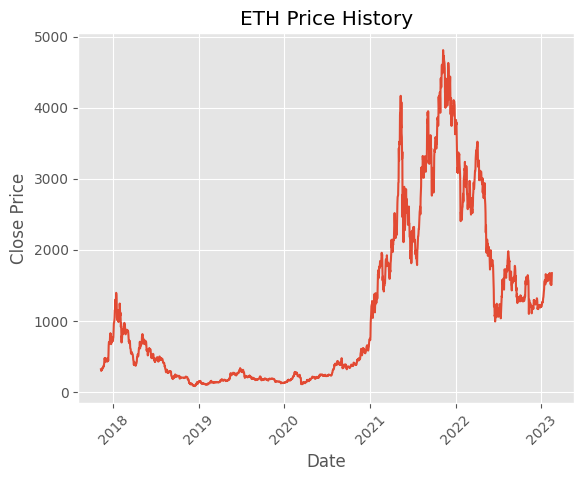

In [96]:
plt.figure()
plt.plot('Date','Close',data=df)
plt.title('ETH Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [92]:
df['Returns'] = (df['Close']/df['Open']) - 1  # Returns is the profit/loss when ETH is bought and sold on the same day
df

,Date,Open,High,Low,Close,Volume,Returns
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0.039654
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,-0.066791
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0.053904
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,-0.021551
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0.031564
...,...,...,...,...,...,...,...
1920,2023-02-11,1514.941895,1541.334717,1510.146973,1539.926758,5064007416,0.016492
1921,2023-02-12,1539.776001,1545.554199,1501.462036,1515.033691,5319698775,-0.016069
1922,2023-02-13,1514.916992,1524.731445,1470.023926,1507.165894,9363855114,-0.005117
1923,2023-02-14,1506.992065,1562.034302,1497.194458,1556.875122,9249575045,0.033101


In [97]:
df['Returns'].kurtosis() # Positive output means the chance of 'extreme' values are rare, also can be calculated using Z-value

5.280382212083462

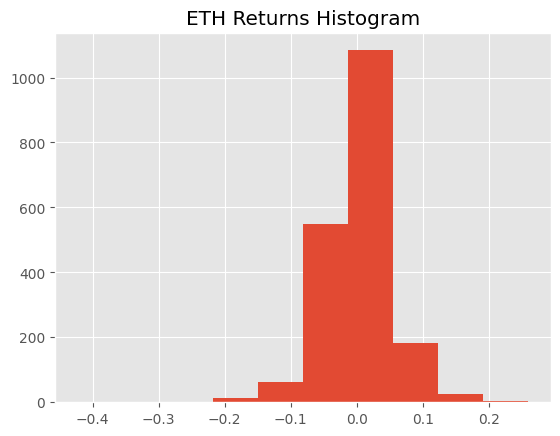

In [98]:
df['Returns'].hist()
plt.title('ETH Returns Histogram')
plt.show()

In [ ]:
df['High'].max() # All Time High (ATH)

4891.70459